# Import Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Import Datasets

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [4]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


# Research Question

## 1. Dalam konteks bisnis dan ilmiah, apakah memprediksi nilai kesadahan (Hardness) air tanah merupakan hal yang mendesak? Jelaskan urgensinya!


Dalam konteks bisnis, menganalisis kesadahan (Hardness) air merupakan hal yang mendesak untuk diprediksi tergantung dengan jenis bisnis yang dijalani. Memprediksi kesadahan air merupakan hal yang mendesak jika bisnis yang dijalankan merupakan bisnis yang menggunakan air tanah sebagai primary activities maupun support activities. Tingkat kesadahan air memiliki urgensi yang tinggi saat air tanah digunakan sebagai proses bisnis utama, seperti pengolahan air maupun dalam proses yang mendukung bisnis yang dijalankan, seperti penggunaan air tanah dalam produksi produk/jasa. Hal ini memiliki urgensi yang tinggi karena, dengan air tanah yang memiliki kesadahan yang tinggi, produk/jasa yang disediakan akan menghasilkan kualitas yang lebih rendah, infrastruktur dalam proses produksi dapat rusak, bahkan dapat mengurangi tingkat kepercayaan investor dalam berinvestasi dalam bisnis yang dijalankan. Beberapa urgensi tersebut dapat dibuktikan dengan kandungan sodium dan magnesium yang sejalan dengan tingkat kesadahan air. Dengan kandungan sodium dan magnesium yang tinggi,  jika air tanah tersebut digunakan dalam produksi, maka kandungan tersebut dapat merusak peralatan yang digunakan untuk proses produksi.

Dalam konteks ilmiah, menganalisis kesadahan (Hardness) air merupakan hal yang mendesak untuk diprediksi. Hal ini dikarenakan kesadahan air yang menunjukkan zat-zat kimia yang membahayakan kesehatan. Dengan prediksi akan kesadahan air, ilmuan dapat melakukan studi yang lebih mendalam tentang bagaimana kesadahan air memengaruhi perilaku dan mobilitas zat-zat kimia yang ada dalam air tanah, pengaruh perubahan iklim terhadap kesadahan air tanah, dan penelitian - penelitian lebih lanjut tentang pengaruh kesadahan air terhadap lingkungan.

## 2. Apakah submisi Kaggle Anda mengalami overfit atau underfit? Jika iya, jelaskan mengapa submisi tersebut Anda anggap sebagai overfit atau underfit serta jelaskan bagaimana cara mengatasi hal tersebut! Jika tidak, jelaskan mengapa!

## 3. Jawablah pertanyaan-pertanyaan statistik berikut:

### a. Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?

In [5]:
train_df.loc[(train_df["Sodium"] > train_df["Sodium"].quantile(0.75)) & (train_df["Alkalinity, total"] > train_df["Alkalinity, total"].mean())]["Hardness"].mean()

383.0833134765625

Rata-rata hardness: 383,0833

### b. Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!

{'whiskers': [<matplotlib.lines.Line2D at 0x2a740c3b850>,
 'caps': [<matplotlib.lines.Line2D at 0x2a740c0abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a740c0ab10>],
 'medians': [<matplotlib.lines.Line2D at 0x2a740c46910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a740c47350>],
 'means': []}

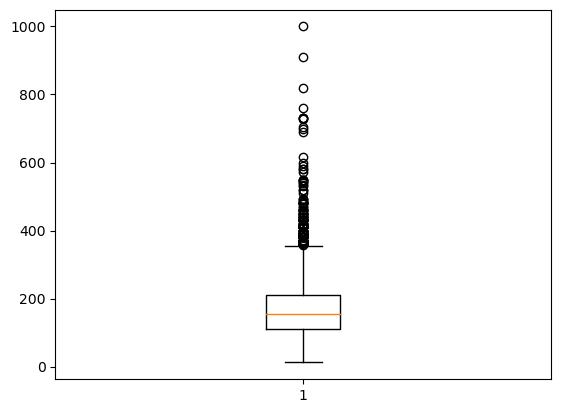

In [6]:
plt.boxplot(train_df["Alkalinity, total"])

In [7]:
def detect_outliers_stddev(data, threshold=1.5):
    outliers_mask = abs(data - data.mean()) > threshold * data.std()
    print(f"data mean: {data.mean()}")
    print(f"data std: {data.std()}")
    return outliers_mask

In [9]:
outliers_mask = detect_outliers_stddev(train_df["Alkalinity, total"])

count_true_false = outliers_mask.value_counts()
print(count_true_false)

data mean: 167.151046875
data std: 83.15780330063326
Alkalinity, total
False    5831
True      569
Name: count, dtype: int64


Outlier kebasaan: 569 baris data merupakan outlier dihitung menggunakan aturan 1.5 IQR. Rata-rata (mean) data kolom kebasaan adalah 167,151 dan standar deviasinya (std) 83,158. Dari sini ditetapkan outlier adalah data (xi) yang selisihnya dengan rata-rata lebih dari 1.5*standar deviasi, secara matematis xi adalah outlier adalah jika memenuhi abs(xi - mean) > 1.5*std.

## 4. Apakah ada hubungan antara Specific Conductivity dan Hardness? Jelaskan!


In [10]:
correlation = train_df["Specific Conductivity"].corr(train_df["Hardness"])
print(f"Koefisien Korelasi Pearson: {correlation}")

Koefisien Korelasi Pearson: 0.6352710459414747


Ya, ada hubungan korelasi positif antara specific conductivity dan hardness dilihat dari nilai korelasi pearson antara kedua kolom. Korelasi pearson dihitung menggunakan rumus koefisien korelasi Pearson sebagai berikut: (BISA MASUKKIN FOTO GAKKK ATO RUMUS)

Nilai pada korelasi pearson berada di rentang -1 sampai 1 di mana semakin dekat ke -1 berarti korelasi semakin negatif, semakin dekat ke 1 maka korelasi semakin positif, dan semakin dekat ke 0 maka semakin tidak ada korelasi.
Pada set data ini, nilai korelasi pearson antara specific conductivity dan hardness adalah 0,64 


## 5. Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling tidak mempengaruhi Hardness? Jelaskan!


Untuk menunjukkan pengaruh suatu zat kimia terhadap Hardness, kita dapat menggunakan correlation matrix dengan code sebagai berikut:

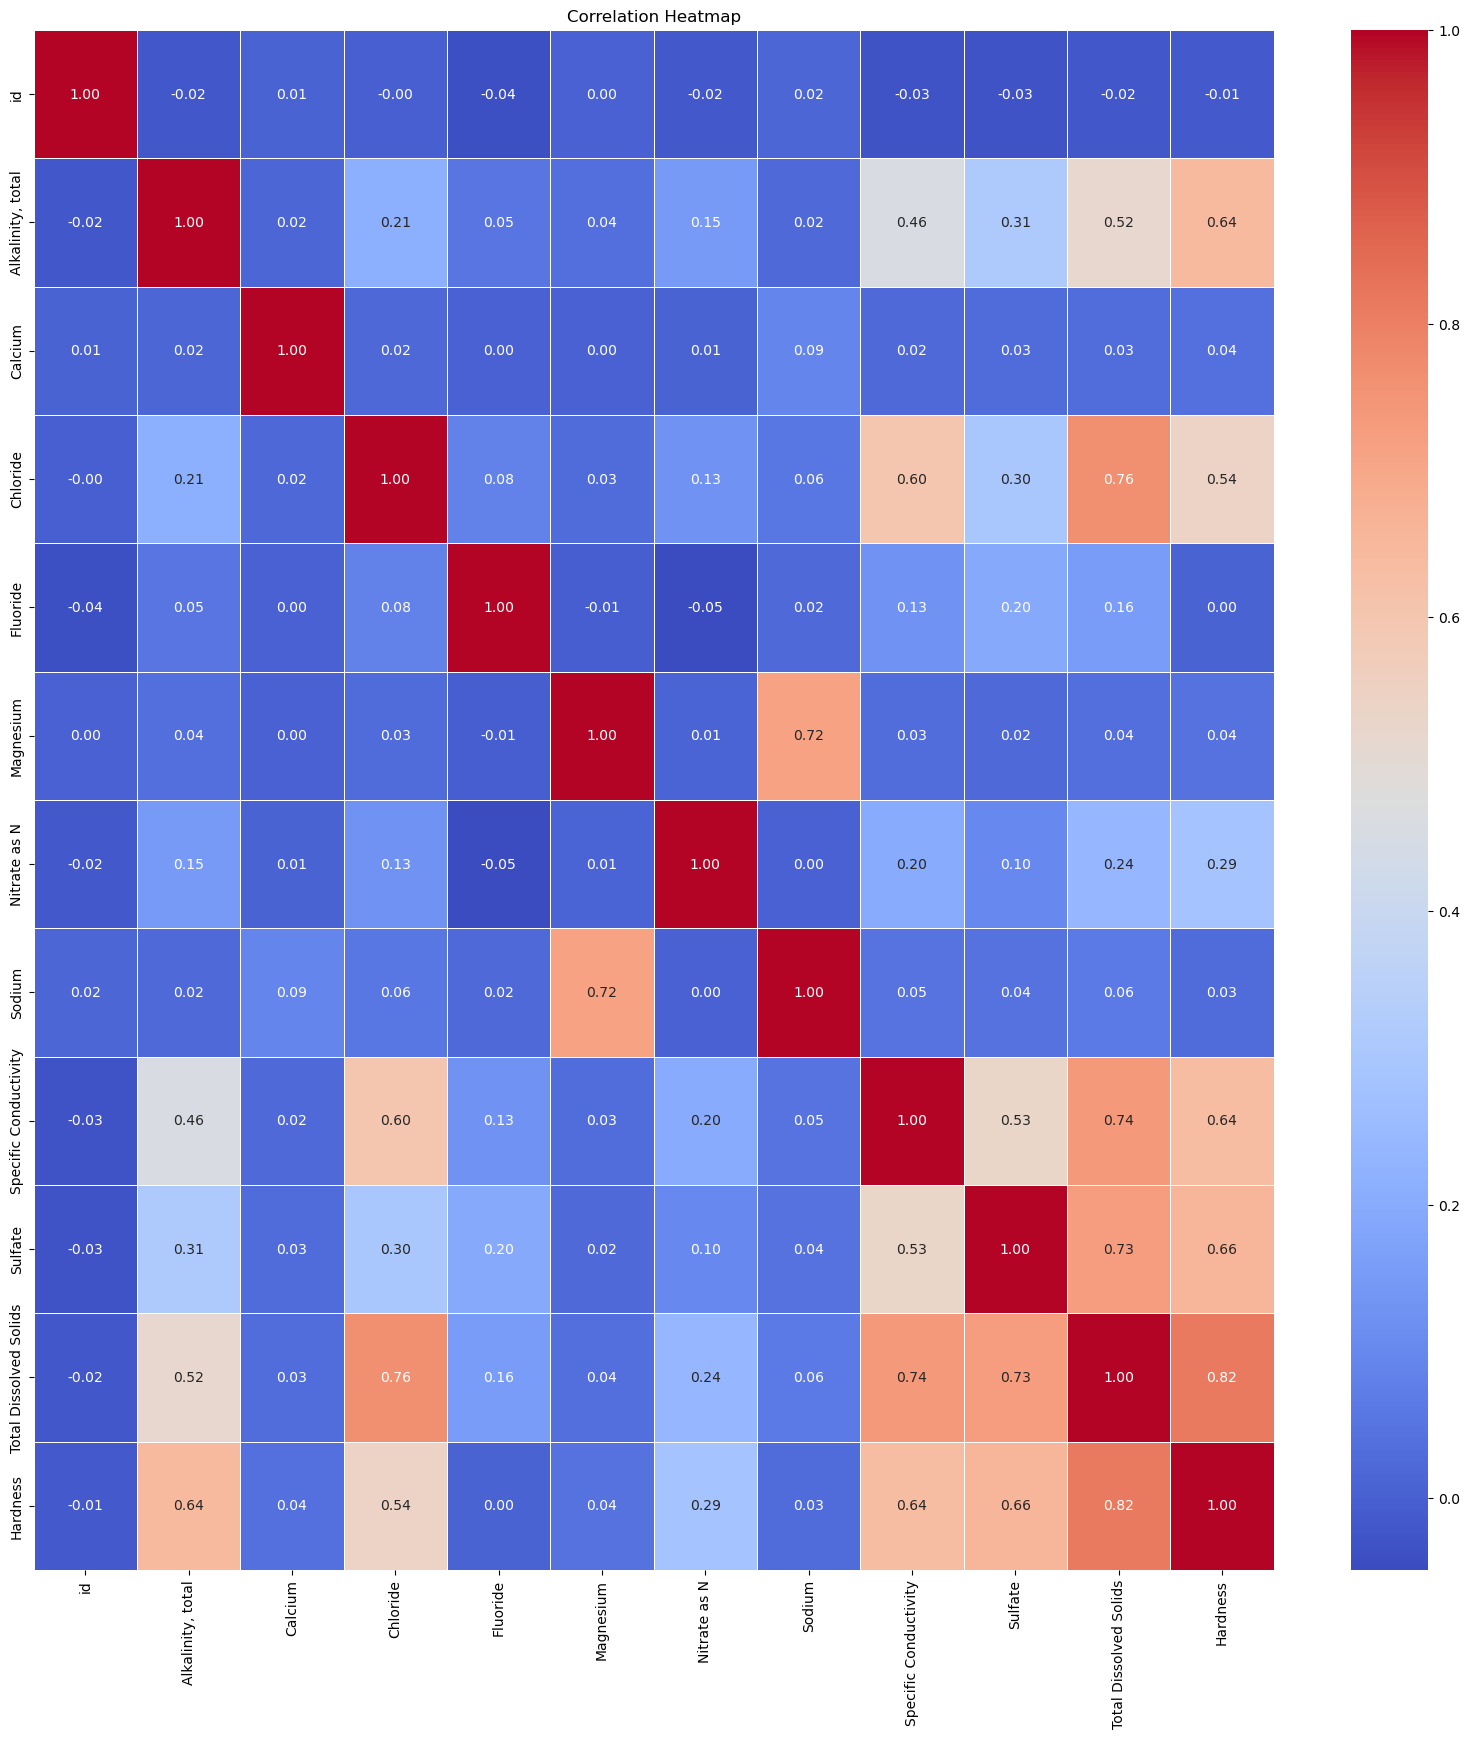

In [11]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Berdasarkan correlation matrix diatas, zat kimia yang paling memengaruhi tingkat Hardness adalah Sulfat dengan nilai korelasi 0.66 dengan Hardness air. Hal ini menunjukkan bahwa semakin tinggi kandungan sulfat dalam air, maka Hardness air akan cenderung semakin tinggi. Sedangkan kandungan fluor pada suatu air memiliki korelasi 0 dengan Hardness air. Hal ini menunjukkan bahwa kandungan fluor pada air tidak memiliki hubungan sama sekali dengan Hardness air.

## 6. Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi tersebut?


In [13]:
correlation = train_df["Sodium"].corr(train_df["Magnesium"])
print(f"Koefisien Korelasi Pearson: {correlation}")


Koefisien Korelasi Pearson: 0.7172360185916836


Terdapat pasangan zat kimia yang berkorelasi tinggi, yaitu Sodium dan Magnesium dengan korelasi 0.72. Berdasarkan korelasi tersebut, kita dapat mengetahui jika suatu air memiliki kandungan Sodium, maka air tersebut cenderung memiliki Magnesium. Setelah melakukan feature engineering dengan penggabungan Sodium dengan Magnesium, kita menemukan bahwa tingkat Hardness air memiliki korelasi yang cukup tinggi dengan penggabungan Sodium dan Magnesium. Hal ini menunjukkan bahwa semakin tinggi kandungan Sodium dan Magnesium dalam air maka hardness air cenderung akan semakin tinggi.

In [ ]:
# tambahin kode penggabungan Sodium + magnesium trus correlation ama hardness air 

## 7. Jelaskan fitur baru apa saja yang anda peroleh untuk membantu kemampuan model dalam memprediksi ketika anda melalui proses feature engineering

## 8. Jelaskan model yang Anda gunakan dalam memprediksi label Hardness! Mengapa Anda menggunakan model tersebut?


## 9. Menurut Anda, apakah metrik penilaian R2 tepat? Jika tidak, metrik penilaian apa yang menurut anda lebih tepat digunakan? Elaborasikan jawaban Anda!

## 10. Jika Anda boleh mengambil data dari sumber eksternal, data tentang apa yang Anda akanambil? Jelaskan mengapa data tersebut dapat membantu Anda memprediksi Hardness!